---
# Principal Component Analysis
---

The steps involved in performing Principal Component Analysis (PCA) are as follows:

1. Data Preparation: The first step is to prepare the data by normalizing the features, so that they have a similar scale. This is important because PCA is sensitive to the scale of the data.

2. Compute the Covariance Matrix: The next step is to compute the covariance matrix of the data. The covariance matrix is a square matrix that describes the relationships between the features of the data. It is computed by taking the dot product of the data matrix with its transpose.

3. Compute the Eigenvectors and Eigenvalues: The eigenvectors and eigenvalues of the covariance matrix are computed next. The eigenvectors represent the directions in which the data varies the most, while the eigenvalues represent the amount of variance in the data along each eigenvector. The eigenvectors and eigenvalues are computed using matrix decomposition techniques such as singular value decomposition (SVD).

4. Select the Principal Components: The principal components are selected by sorting the eigenvectors in order of their corresponding eigenvalues and selecting the top k eigenvectors that capture the most variance in the data. The number k represents the desired number of dimensions in the reduced dataset.

5. Project the Data onto the Principal Components: The final step is to project the data onto the selected principal components to obtain the reduced dataset. This is done by taking the dot product of the data matrix with the selected eigenvectors.

These steps are performed to obtain a lower-dimensional representation of the data while retaining the most important information. The reduced dataset can then be used for further analysis or as input to machine learning algorithms.


In [1]:
# Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import uniform
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## Data Preparation
The dataset is a real-valued multivariate dataset with 10 colums and 167 rows.

In [2]:
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/Country-data.csv')
df.columns=["Country", "Child_Mortality", "Exports", "Health_Spending","Imports","Income","Inflation","Life_Expectancy","Total_Fertility","GDP_per_capita"]
df.head()

,Country,Child_Mortality,Exports,Health_Spending,Imports,Income,Inflation,Life_Expectancy,Total_Fertility,GDP_per_capita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


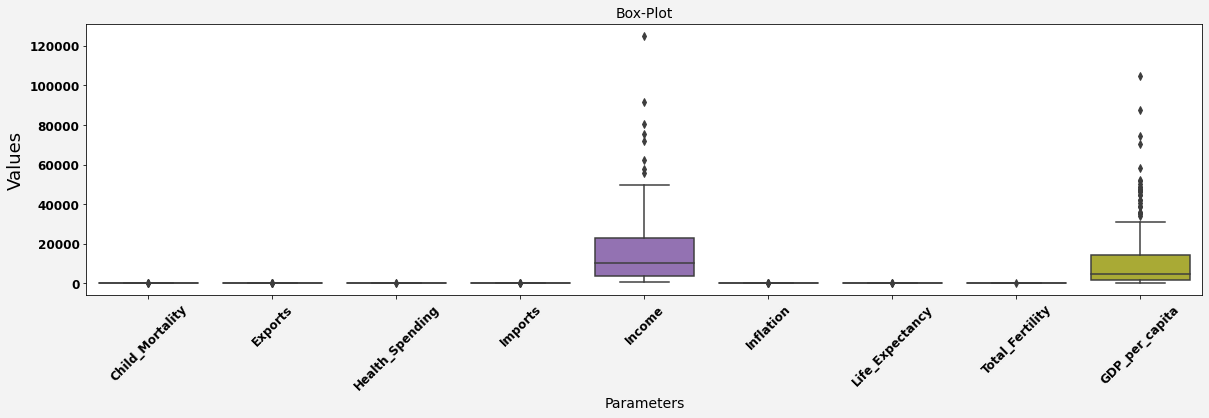

In [3]:
# Plot box-plot to check the data outliers
fig= plt.figure(figsize=(20,5))
fig.set_facecolor("#F3F3F3")
a=sns.boxplot(data=df)
plt.setp(a.get_xticklabels(), rotation=45)
plt.title('Box-Plot', fontsize=14)
plt.ylabel('Values', fontsize=18);plt.xlabel('Parameters',fontsize=14)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

- From the box-plot graph, we observe that the outliers observed in the case of exports, health, imports, income, and gdpp

array([[<AxesSubplot:title={'center':'Child_Mortality'}>,
        <AxesSubplot:title={'center':'Exports'}>,
        <AxesSubplot:title={'center':'Health_Spending'}>],
       [<AxesSubplot:title={'center':'Imports'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Inflation'}>],
       [<AxesSubplot:title={'center':'Life_Expectancy'}>,
        <AxesSubplot:title={'center':'Total_Fertility'}>,
        <AxesSubplot:title={'center':'GDP_per_capita'}>]], dtype=object)

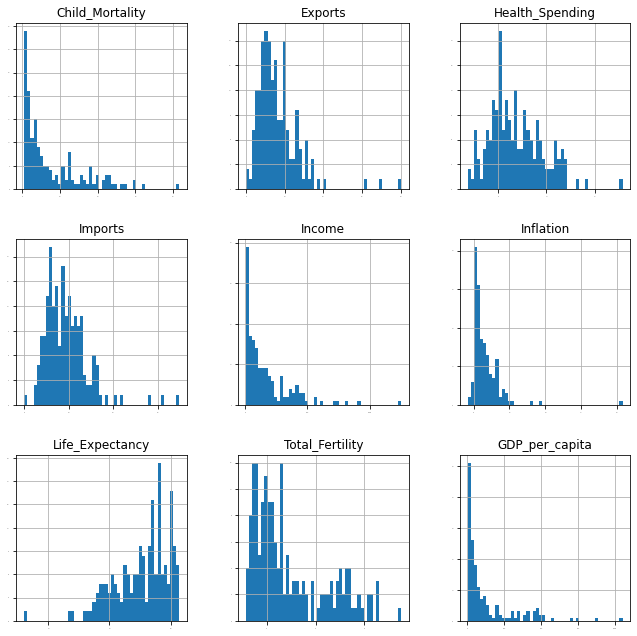

In [4]:
df.hist(bins=50, xlabelsize=-1, ylabelsize=-1, figsize=(11,11))

### Analyse Correlation Matrix
Check for highly correlated features：

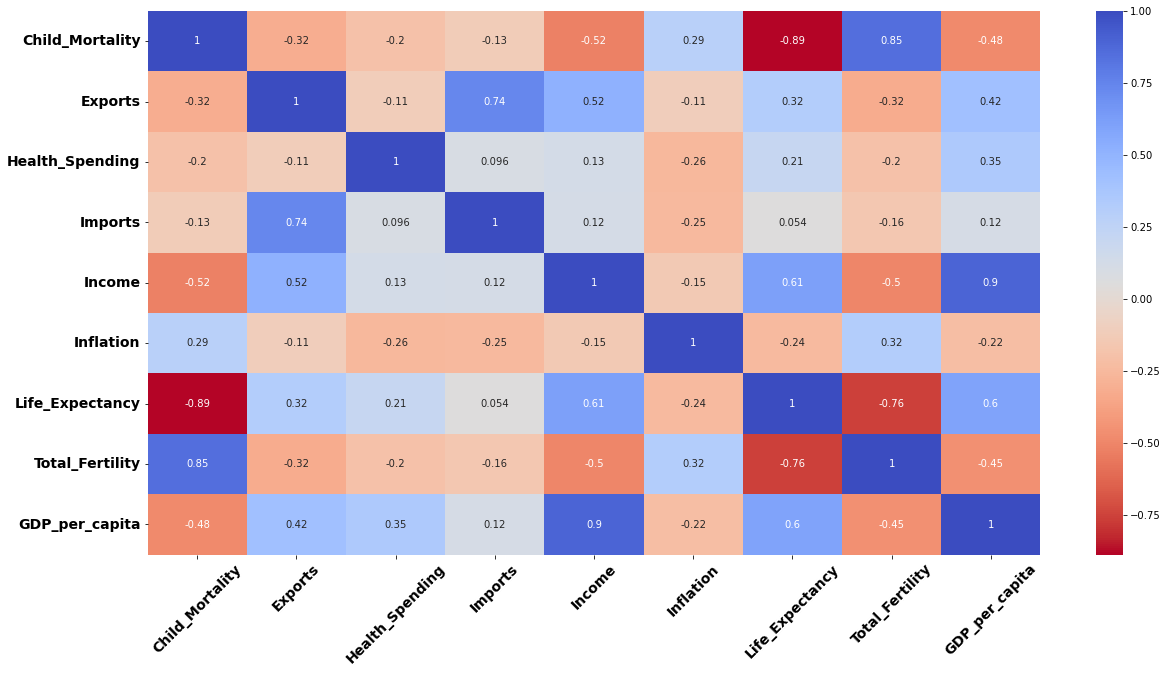

In [5]:

plt.figure(figsize = (20,10))  
fig.set_facecolor("#F3F3F3")
g=df.corr()
b=sns.heatmap(df.corr(),cmap="coolwarm_r",annot = True)
plt.setp(b.get_xticklabels(), rotation=45)
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.show()


- Exports, imports, health spending, income are highly correlated with GDP per capita.
- These numerical variables are also observed highly correlated with each other.
- The PCA model doesn't need the data to be highly correlated to work correctly but is necessary and becomes applicable only when the data is highly correlated.

Thus, PCA analysis will be performed without further modification in the dataset.

### Implement PCA

Scaling the features in data prior to applying PCA is necessary as the results of PCA can be influenced by the scale of the data.

In [6]:
X = df.drop('Country',1)
X_std = StandardScaler().fit_transform(X)

pca = PCA()
pca.fit(X_std)


PCA()

check the eigenvalues to find most important components



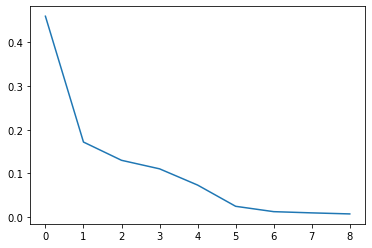

In [7]:
plt.plot(pca.explained_variance_ratio_)

In [8]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:4].sum())

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]
0.8719078614023908


- The first 4 eigenvectors account for 87% of the variance and will be kept

---
The first 4 principal components:

In [9]:
colnames = list(X.columns)
prinComp_df = pd.DataFrame({ 'Feature':colnames,
                            'PC1':pca.components_[0],
                            'PC2':pca.components_[1],
                            'PC3':pca.components_[2],
                            'PC4':pca.components_[3]})
prinComp_df

,Feature,PC1,PC2,PC3,PC4
0,Child_Mortality,-0.419519,0.192884,-0.029544,0.370653
1,Exports,0.283897,0.613163,0.144761,0.003091
2,Health_Spending,0.150838,-0.243087,-0.596632,0.461897
3,Imports,0.161482,0.671821,-0.299927,-0.071907
4,Income,0.398441,0.022536,0.301548,0.392159
5,Inflation,-0.193173,-0.008404,0.642520,0.150442
6,Life_Expectancy,0.425839,-0.222707,0.113919,-0.203797
7,Total_Fertility,-0.403729,0.155233,0.019549,0.378304
8,GDP_per_capita,0.392645,-0.046022,0.122977,0.531995


### Visulaize the first two principal components

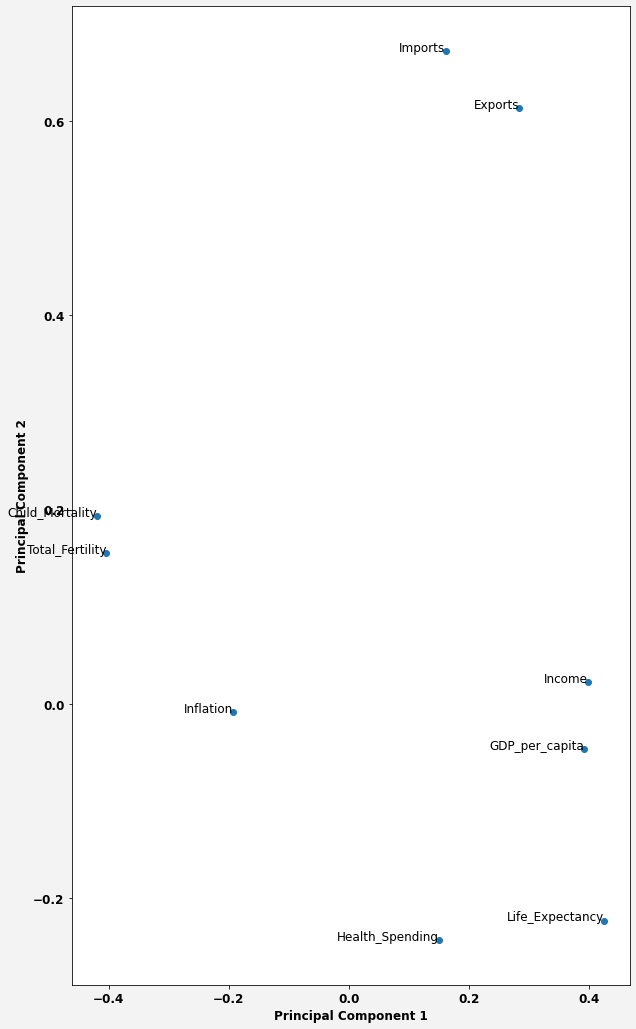

In [10]:

fig = plt.figure(figsize = (10,18))
fig.set_facecolor("#F3F3F3")
plt.scatter(prinComp_df.PC1, prinComp_df.PC2)
plt.xlabel('Principal Component 1',fontsize=12, fontweight='bold')
plt.ylabel('Principal Component 2',fontsize=12, fontweight='bold')
for i, txt in enumerate(prinComp_df.Feature):
    plt.annotate(txt, (prinComp_df.PC1[i],prinComp_df.PC2[i]),fontsize=12,  horizontalalignment='right')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

- The graph shows the principal component number one is observed to be in the direction where GDP per capita, Income, Health Spending, Life Expectancy are high.
- Similarly, the main component number two is observed to be where child mortality and Total fertility are higher.

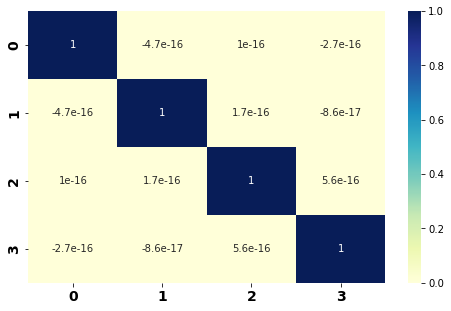

In [11]:
# Take the transpose of the PC matrix so that we can create the new matrix
pca2 = PCA(n_components=4)
df_pca = pca2.fit_transform(X_std)
pc5 = np.transpose(df_pca)

# Create correlation matrix for the principal components
corrmat = np.corrcoef(pc5)

plt.figure(figsize = (8,5))  
fig.set_facecolor("#F3F3F3")
sns.heatmap(corrmat,cmap="YlGnBu",annot = True)
plt.setp(b.get_xticklabels(), fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.show()

In [12]:
df_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01,
         5.56335553e-02],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01,
      